In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_labels = pd.read_csv('csvjoinv2/hypercube.join.node.csv', sep=';')
df_features = pd.read_csv('../../network_specs/hypercube.specs.csv', sep=';')


In [3]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [4]:
df_labels['State'].value_counts()

0    356864
Name: State, dtype: int64

In [5]:
df_labels['Id'].value_counts()

(0, 1, 0, 0, 1, 0, 1, 0, 1)    697
(1, 0, 0, 0, 0, 0, 1, 0, 0)    697
(1, 0, 1, 0, 0, 1, 1, 0, 1)    697
(0, 1, 1, 0, 1, 1, 0, 0, 0)    697
(1, 0, 1, 0, 0, 1, 0, 1, 0)    697
                              ... 
(0, 1, 0, 1, 1, 1, 1, 1, 0)    697
(0, 1, 0, 0, 0, 1, 1, 0, 0)    697
(0, 1, 0, 0, 0, 0, 1, 1, 1)    697
(1, 1, 1, 0, 0, 1, 1, 0, 0)    697
(0, 1, 1, 0, 1, 1, 0, 0, 1)    697
Name: Id, Length: 512, dtype: int64

In [6]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,"(0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0
1,"(0, 0, 0, 0, 0, 0, 0, 0, 1)",0.0
2,"(0, 0, 0, 0, 0, 0, 0, 1, 0)",0.0
3,"(0, 0, 0, 0, 0, 0, 0, 1, 1)",0.0
4,"(0, 0, 0, 0, 0, 0, 1, 0, 0)",0.0
...,...,...
507,"(1, 1, 1, 1, 1, 1, 0, 1, 1)",0.0
508,"(1, 1, 1, 1, 1, 1, 1, 0, 0)",0.0
509,"(1, 1, 1, 1, 1, 1, 1, 0, 1)",0.0
510,"(1, 1, 1, 1, 1, 1, 1, 1, 0)",0.0


In [7]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [8]:
df_data['binary_state'] = df_data['State'] > 0.0

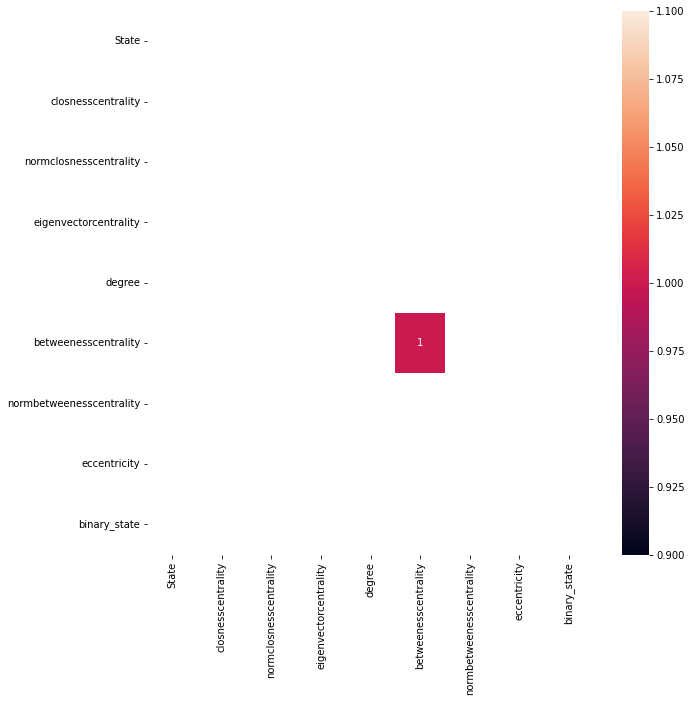

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

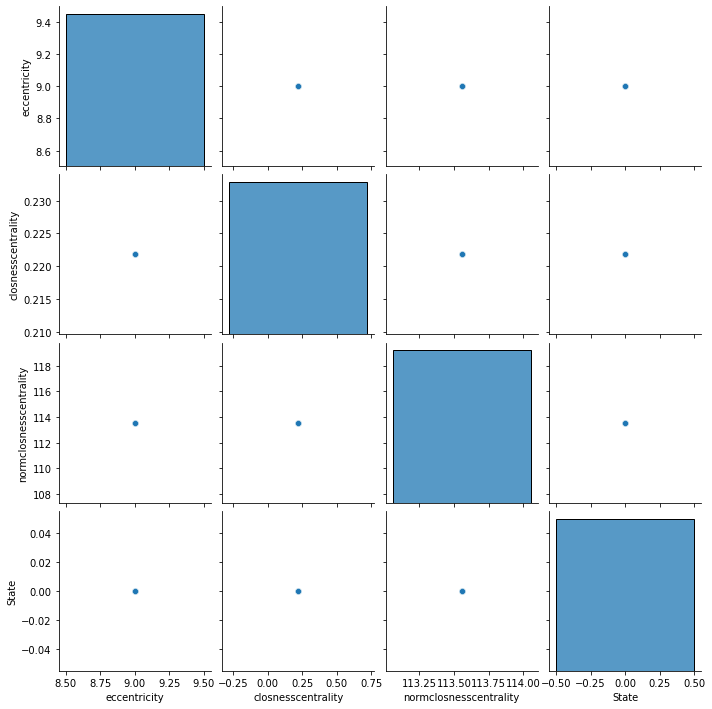

In [10]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality',
         'State'
        ]
    ]
)

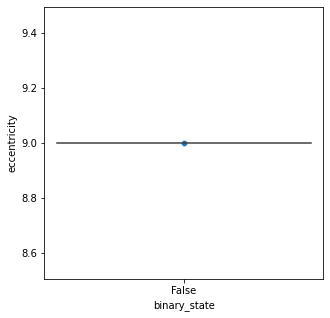

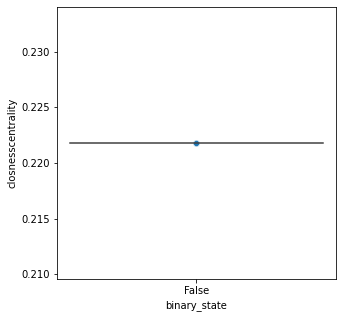

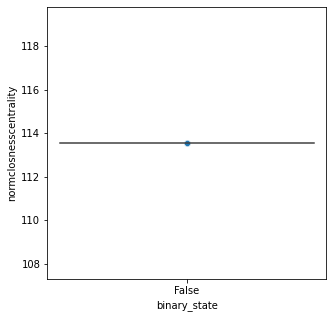

In [11]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

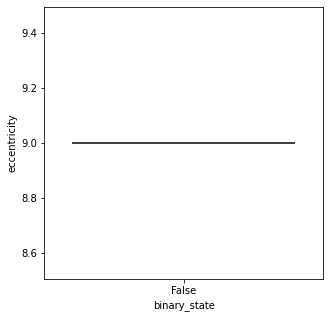

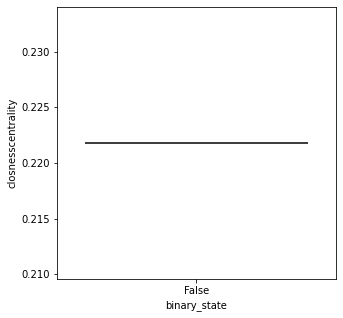

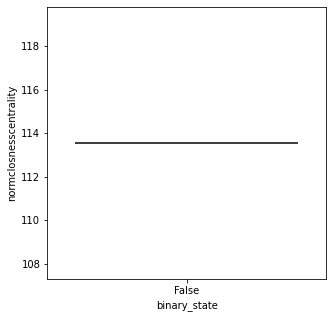

In [12]:
for col in ['eccentricity',
         'closnesscentrality',
         'normclosnesscentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()